<a href="https://colab.research.google.com/github/iam-fern/real_data/blob/main/cluster_Oximetry_Data_rep1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import random
import statsmodels.api as sm
%matplotlib inline
from google.colab import files
from sklearn.cluster import KMeans

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# where your file is located
FILE_LOCATION = '/content/drive/My Drive/pattern_realdata/Oximetry_Data.csv'

In [4]:
df = pd.read_csv(FILE_LOCATION)
df
#df.head()

,no,obs,rep,CO,PULSE,obs_new,CO_new,PULSE_new,CO_1,PULSE_1,CO_2,PULSE_2,CO_3,PULSE_3
0,1,1,1,0.5497,0.3889,1.0,0.5299,0.4104,0.5497,0.3889,0.5102,0.4102,0.5297,0.4320
1,2,1,2,0.5102,0.4102,2.0,0.3314,0.3208,0.3414,0.3274,0.3194,0.3076,0.3334,0.3274
2,3,1,3,0.5297,0.4320,3.0,0.6372,0.5694,0.6856,0.6585,0.6048,0.5248,0.6213,0.5248
3,4,2,1,0.3414,0.3274,4.0,0.2732,0.2500,0.2181,-0.1224,0.2842,0.3475,0.3174,0.5248
4,5,2,2,0.3194,0.3076,5.0,0.4837,0.4127,0.4959,0.5006,0.4475,0.4102,0.5078,0.3274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,179,60,2,0.7042,0.5248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,180,60,3,0.7432,0.6021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,181,61,1,0.4982,0.4102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,182,61,2,0.5174,0.3680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
table = df[['obs_new', 'CO_1', 'PULSE_1']]
table

,obs_new,CO_1,PULSE_1
0,1.0,0.5497,0.3889
1,2.0,0.3414,0.3274
2,3.0,0.6856,0.6585
3,4.0,0.2181,-0.1224
4,5.0,0.4959,0.5006
...,...,...,...
178,NaN,NaN,NaN
179,NaN,NaN,NaN
180,NaN,NaN,NaN
181,NaN,NaN,NaN


In [6]:
# Define in which columns to look for missing values.
table1 = table.dropna(subset=['obs_new', 'CO_1', 'PULSE_1'])
table1

,obs_new,CO_1,PULSE_1
0,1.0,0.5497,0.3889
1,2.0,0.3414,0.3274
2,3.0,0.6856,0.6585
3,4.0,0.2181,-0.1224
4,5.0,0.4959,0.5006
...,...,...,...
56,57.0,1.1579,1.0607
57,58.0,0.8778,0.7202
58,59.0,0.9260,1.1950
59,60.0,0.8333,0.5754


In [7]:
x = table1[['PULSE_1']]
y = table1['CO_1']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)

df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

table_data_new = pd.DataFrame({ 'x1'    : table1['PULSE_1'],
                                'y'     : table1['CO_1'],
                                'y_hat' : df['Predicted']})
table_data_new['e'] = table_data_new['y'] - table_data_new['y_hat']
table_data_new

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,x1,y,y_hat,e
0,0.3889,0.5497,0.479894,0.069806
1,0.3274,0.3414,0.426954,-0.085554
2,0.6585,0.6856,0.711971,-0.026371
3,-0.1224,0.2181,0.039757,0.178343
4,0.5006,0.4959,0.576048,-0.080148
...,...,...,...,...
56,1.0607,1.1579,1.058194,0.099706
57,0.7202,0.8778,0.765084,0.112716
58,1.1950,0.9260,1.173802,-0.247802
59,0.5754,0.8333,0.640437,0.192863


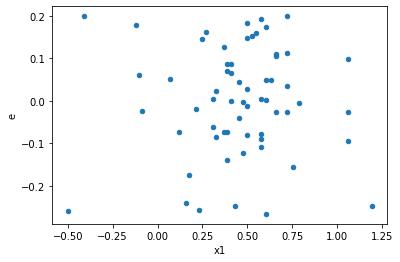

In [8]:
table_data_new.plot(x ='x1', y='e', kind = 'scatter')

In [9]:
# แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean
#Set number of clusters
x = table_data_new[['y_hat']]
k_means = KMeans(n_clusters=2)
#Run the clustering algorithm
model = k_means.fit(x)
#Generate cluster predictions and store in y_kmeans
#km.fit(x)
y_kmeans = k_means.predict(x)
y_kmeans

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [10]:
# kmean_clusters.astype(float)
kmean_clusters = pd.DataFrame({'clusters' : y_kmeans})
kmean_clusters.head()

,clusters
0,0
1,1
2,0
3,1
4,0


In [11]:
# เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
data_clusters = pd.concat([table_data_new, kmean_clusters], axis=1)
data_clusters

,x1,y,y_hat,e,clusters
0,0.3889,0.5497,0.479894,0.069806,0
1,0.3274,0.3414,0.426954,-0.085554,1
2,0.6585,0.6856,0.711971,-0.026371,0
3,-0.1224,0.2181,0.039757,0.178343,1
4,0.5006,0.4959,0.576048,-0.080148,0
...,...,...,...,...,...
56,1.0607,1.1579,1.058194,0.099706,0
57,0.7202,0.8778,0.765084,0.112716,0
58,1.1950,0.9260,1.173802,-0.247802,0
59,0.5754,0.8333,0.640437,0.192863,0


In [12]:
# กลุ่มที่ 1
data_cluster0 = data_clusters[data_clusters.clusters == 0]

y = data_cluster0[['y']]
x = data_cluster0[['x1']]
x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit()

DF1 = model1.df_resid + 1
SSE1 = model1.ssr
MSE1 = SSE1/DF1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
DF1

43.0

In [14]:
SSE1

0.5995751219694629

In [15]:
# กลุ่มที่ 2
data_cluster1 = data_clusters[data_clusters.clusters == 1]

y = data_cluster1[['y']]
x = data_cluster1[['x1']]
x = sm.add_constant(x)
model2 = sm.OLS(y, x).fit()

DF2 = model2.df_resid + 1
SSE2 = model2.ssr
MSE2 = SSE2/DF2

In [16]:
DF2

16.0

In [17]:
SSE2

0.3556499722604834

In [18]:
# คำนวณค่าสถิติ
GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)
GQ_test_clusters

1.5941443622784763

In [19]:
# คำนวณค่า p-value
# pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, DF2, DF1)))
p_greater = ss.f.cdf(GQ_test_clusters, DF2, DF1)
p_less = 1.0-ss.f.cdf(GQ_test_clusters, DF2, DF1)

In [20]:
two_tailed

0.2241880007309598

In [21]:
p_greater*2

1.7758119992690402

In [22]:
p_less

0.1120940003654799

###### The two-tailed p-value equals: 0.2242

###### p( x < 1.5941 ) = 0.8879
###### p( x > 1.5941 ) = 0.1121
###### p( x < 0.5712 ) + p( x >1.5941) = 0.2242
###### Since p-value > α, H0 is not rejected. (0.2242 > 0.05)

https://www.statskingdom.com/p_value.html

In [23]:
Significance = 0.05
if two_tailed < Significance:
  print('Reject005=0 : Heteroscedasticity')
else:
  print('Reject005=1 : Homoscedasticity')

Reject005=1 : Homoscedasticity
